In [1]:
import os

import cv2
from PIL import Image
import random
import numpy as np
from utils.detect_line import detect_lines
from utils.hot import hot_detect_line

In [2]:
ori_img = cv2.imread('../static/img/3.png')
lines = hot_detect_line('../static/img/3.png', None, None, 0, path='../static/record/')
# white = np.ones((height[1]-height[0], width[1]-width[0], 3), dtype=np.uint8) * 255
white = np.ones_like(ori_img) * 255
for line in lines:
    cv2.line(white, (line[0][0], line[0][1]), (line[1][0], line[1][1]), line[2], 1)
Image.fromarray(ori_img).save("workdir/run/0.png")
Image.fromarray(white).save("workdir/run/1.png")

  0%|          | 0/140 [00:00<?, ?it/s]

In [4]:
# 颜色过滤
def color_filter(lines, color):
    return [line for line in lines if line[2] != color]
#是竖线
def _is_vertical(line):
    return line[0][0] - line[1][0] == 0
def _is_horizontal(line):
    return line[0][1] - line[1][1] == 0
# 斜线和直线分层
def line_filter(lines):
    lines_a = []
    lines_b = []
    for line in lines:
        if _is_vertical(line) or _is_horizontal(line):
            lines_a.append(line)
        else:
            lines_b.append(line)
    return lines_a, lines_b

In [5]:
# 去黑线
line_a = color_filter(lines, (0, 0, 0))
line_a, line_b = line_filter(line_a)

In [6]:
white = np.ones_like(ori_img) * 255
for line in line_a:
    cv2.line(white, (line[0][0], line[0][1]), (line[1][0], line[1][1]), line[2], 1)
Image.fromarray(white).save("workdir/run/a.png")
for line in line_b:
    cv2.line(white, (line[0][0], line[0][1]), (line[1][0], line[1][1]), line[2], 1)
Image.fromarray(white).save("workdir/run/b.png")

In [7]:
from utils.detect_connect import detect_connect
groups = detect_connect(line_a)

0 16854
1 16854
2 16854
3 16854
4 16854
5 16854
6 16854
7 16854
8 16854
9 16854
10 16854
11 16854
12 16854
13 16854
14 16854
15 16854
16 16854
17 16854
18 16854
19 16854
20 16854
21 16854
22 16854
23 16854
24 16854
25 16854
26 16854
27 16854
28 16854
29 16854
30 16854
31 16854
32 16854
33 16854
34 16854
35 16854
36 16854
37 16854
38 16854
39 16854
40 16854
41 16854
42 16854
43 16854
44 16854
45 16854
46 16854
47 16854
48 16854
49 16854
50 16854
51 16854
52 16854
53 16854
54 16854
55 16854
56 16854
57 16854
58 16854
59 16854
60 16854
61 16854
62 16854
63 16854
64 16854
65 16854
66 16854
67 16854
68 16854
69 16854
70 16854
71 16854
72 16854
73 16854
74 16854
75 16854
76 16854
77 16854
78 16854
79 16854
80 16854
81 16854
82 16854
83 16854
84 16854
85 16854
86 16854
87 16854
88 16854
89 16854
90 16854
91 16854
92 16854
93 16854
94 16854
95 16854
96 16854
97 16854
98 16854
99 16854
100 16854
101 16854
102 16854
103 16854
104 16854
105 16854
106 16854
107 16854
108 16854
109 16854
110 16854


100%|██████████| 386/386 [01:54<00:00,  3.38it/s]


In [14]:
groups

[[[(2154, 2042), (2154, 2028), (0, 255, 0)],
  [(2155, 2027), (2155, 2019), (0, 255, 0)],
  [(2155, 2047), (2155, 2043), (0, 255, 0)]],
 [[(2155, 1466), (2155, 1458), (0, 255, 0)]],
 [[(2155, 1490), (2155, 1482), (0, 255, 0)]],
 [[(2341, 1466), (2341, 1458), (0, 255, 0)],
  [(2341, 1490), (2341, 1482), (0, 255, 0)],
  [(2342, 1481), (2342, 1467), (0, 255, 0)],
  [(2342, 1474), (2504, 1474), (0, 255, 0)]],
 [[(2341, 2027), (2341, 2019), (0, 255, 0)],
  [(2341, 2047), (2341, 2043), (0, 255, 0)],
  [(2342, 2042), (2342, 2028), (0, 255, 0)],
  [(2342, 2035), (2691, 2035), (0, 255, 0)]],
 [[(2512, 2047), (2512, 4096), (0, 255, 0)]],
 [[(2700, 2027), (2700, 1482), (0, 255, 0)]],
 [[(2700, 2047), (2700, 2048), (0, 255, 0)]],
 [[(2889, 1647), (2889, 1483), (0, 255, 0)]],
 [[(2889, 1710), (2889, 1664), (0, 255, 0)]],
 [[(2889, 2047), (2889, 2048), (0, 255, 0)]],
 [[(3361, 458), (3361, 444), (0, 255, 0)],
  [(3362, 443), (3362, 435), (0, 255, 0)],
  [(3362, 467), (3362, 459), (0, 255, 0)]],
 [[(

In [18]:
def count_group(groups):
    groups_by_len = arrange_group(groups)
    lens = {}
    for k, v in groups_by_len.items():
        lens[k] = len(v)
    return sorted(lens.items(), key=lambda x:x[0])
lens = count_group(groups)
lens

[(1, 10666),
 (2, 209),
 (3, 768),
 (4, 258),
 (5, 102),
 (6, 77),
 (7, 15),
 (8, 12),
 (9, 2),
 (10, 6),
 (11, 5),
 (12, 4),
 (13, 3),
 (14, 3),
 (15, 5),
 (17, 1),
 (20, 2),
 (21, 1),
 (22, 1),
 (26, 1),
 (28, 1),
 (29, 1),
 (31, 2),
 (32, 1),
 (37, 1),
 (39, 2),
 (45, 2),
 (46, 1),
 (66, 6)]

In [19]:
def arrange_group(groups):
    groups_by_len = {}
    for it in groups:
        if len(it) not in groups_by_len:
            groups_by_len[len(it)] = []
        groups_by_len[len(it)].append(it)
    return groups_by_len
groups_by_len = arrange_group(groups)

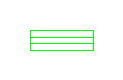

In [40]:
from utils.detect_connect import get_max_coord
from utils.detect_connect import get_min_coord

# def get_min_coord(lines):
#     min_x = min([line[0][0] for line in lines] + [line[1][0] for line in lines])
#     min_y = min([line[0][1] for line in lines] + [line[1][1] for line in lines])
#     return min_x, min_y

def draw_group(group, padding=30):
    max_x, max_y = get_max_coord(group)
    min_x, min_y = get_min_coord(group)
    width, height = max_x - min_x, max_y - min_y
    white = np.ones((height + 2 * padding, width + 2 * padding, 3), dtype=np.uint8) * 255
    ax = -min_x + padding
    ay = -min_y + padding
    for line in group:
        cv2.line(white, (line[0][0] + ax, line[0][1] + ay), (line[1][0] + ax, line[1][1] + ay), line[2], 1)
    return white

white = draw_group(groups_by_len[6][2])
Image.fromarray(white)

In [41]:
from tqdm import tqdm

SAVE_DIR = f"workdir/run/{random.randint(0, 1000000):07}/"
os.makedirs(SAVE_DIR, exist_ok=True)
for k in groups_by_len.keys():
    if k <= 3:
        continue
    os.makedirs(os.path.join(SAVE_DIR, f"{k}"), exist_ok=True)
    for idx, group in enumerate(tqdm(groups_by_len[k])):
        white = draw_group(group)
        Image.fromarray(white).save(os.path.join(SAVE_DIR, f"{k}", f"{idx}.png"))

100%|██████████| 1/1 [00:00<00:00, 249.99it/s]


In [26]:
os.path.join(SAVE_DIR, f"{k}", f"{idx}.png")

'workdir/run/0400340/6\\0.png'